In [1]:
#importing libraries
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cancer_data = load_breast_cancer()
#print(cancer_data.DESCR)

In [2]:
#loading the data
cancer_data=load_breast_cancer()
#dataset info
cancer_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer_data['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [4]:
#combining features with target variables
dataset=pd.DataFrame(np.c_[cancer_data['data'],
                           cancer_data['target']], columns = np.append(cancer_data['feature_names'], ['target']))

# Checking for missing values

In [5]:
dataset.isnull().sum()
dataset.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

# splitting the data for training and testing

In [6]:
#splitting the target and features
X = dataset.drop(['target'], axis = 1)
y=dataset['target']
#print("X shape", X.shape)
#print("y shape", y.shape)
#print(y)

In [7]:
# split dataset into train(80%) and test(20%)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)

In [8]:
#Classification and Regression comes under Supervised learning.
#Regression technique is used when the output is real or continous.
#classification is used when the output is category like Yes/No
#In the given dataset, we have only two sets of values (M,B),
#So I chose classification algorithms of my choice(KNN, Random Forest, SVM)

# Feature scaling

In [9]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# KNN Classifier

In [10]:
#working of KNN
#choose the number k of neighbors
#take the k nearest neighbors of new data point, according to euclidean dist
#among these k neighbors, count num of data points in each category
#assign new data point to the category where you counted the most neighbors
#model is ready

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred_knn = knn_classifier.predict(X_test) 
accuracy_score(y_test, y_pred_knn) 

0.956140350877193

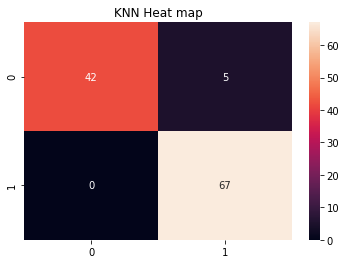

In [13]:
#visualizing confusion matrix
from sklearn.metrics import confusion_matrix
knn_cm = confusion_matrix(y_test, y_pred_knn)
plt.title('KNN Heat map')
sns.heatmap(knn_cm,annot=True)
plt.show()

# KNN Metrics

In [14]:
#printing metrics
from sklearn.metrics import accuracy_score
a1=accuracy_score(y_test,y_pred_knn)
a1

0.956140350877193

In [15]:
#metrics report
from sklearn import metrics
cross_val_knn = cross_val_score(knn_classifier, X, y, cv=3)
print("Cross val score : {}".format(cross_val_knn))
print(metrics.classification_report(y_test, y_pred_knn))

Cross val score : [0.9        0.94736842 0.92063492]
              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        47
         1.0       0.93      1.00      0.96        67

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



# Random Forest

In [16]:
#working
#Random forest is a powerful supervised classification tool. This classification is a type of nearest
#neighor predictor that may be explored as an ensemble method. 
#Instead of generating a single classification tree, RF creates a forest of 
#classification trees from a given dataset.
#From the training set, picked K data points randomly.
#From these K data points, generate the decision trees.
#From generated trees, choose the number of N-tree and repeat steps above
#Form the N-tree that predicts the category to which the data points relate for a new data point, and assign the new data point
# with the highest probability.

In [17]:
from sklearn.ensemble import RandomForestClassifier 
rf_classifier = RandomForestClassifier(n_estimators = 35, criterion = 'entropy', random_state = 0) 
rf_classifier.fit(X_train, y_train) 

RandomForestClassifier(criterion='entropy', n_estimators=35, random_state=0)

In [18]:
y_pred_rf = rf_classifier.predict(X_test) 
accuracy_score(y_test, y_pred_rf)

0.9736842105263158

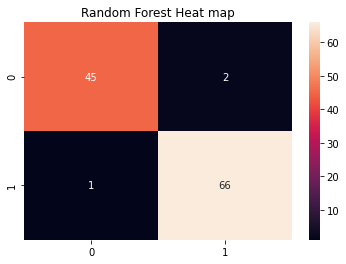

In [19]:
#visualizing confusion matrix
from sklearn.metrics import confusion_matrix
rf_cm = confusion_matrix(y_test, y_pred_rf)
import seaborn as sns
plt.title('Random Forest Heat map')
sns.heatmap(rf_cm,annot=True)
plt.show()

# Random Forest Metrics

In [20]:
#printing metrics
from sklearn.metrics import accuracy_score
a2=accuracy_score(y_test,y_pred_rf)
a2

0.9736842105263158

In [21]:
#metrics report
from sklearn import metrics
cross_val_rf = cross_val_score(rf_classifier, X, y, cv=3)
print("Cross val score : {}".format(cross_val_rf))
print(metrics.classification_report(y_test, y_pred_rf))

Cross val score : [0.95263158 0.97368421 0.94708995]
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        47
         1.0       0.97      0.99      0.98        67

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



# SVM

In [22]:
#working of SVM
#The work of SVM is to find best hyperplane between the data of two classes.
#SVM takes input and outputs a line which separates two classes.
#SVM finds the points closest to the line, which are called support vectors and 
#compute the distance between line and support vectors, which is called as margin ( goal is to maximize margin).
#SVM tries to make the decision boundary, such that the separation between two classes will be maximum.
#kernel's in SVM are used to find correct transformation for any given dataset(non-linear/linear)

In [23]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

In [24]:
y_pred_svm = svm_classifier.predict(X_test) 
accuracy_score(y_test, y_pred_svm)

0.9824561403508771

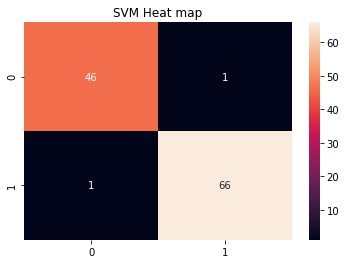

In [25]:
#visualizing confusion matrix
from sklearn.metrics import confusion_matrix
svm_cm = confusion_matrix(y_test, y_pred_svm)
plt.title('SVM Heat map')
sns.heatmap(svm_cm,annot=True)
plt.show()

In [26]:
#printing metrics
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score
a3=accuracy_score(y_test,y_pred_svm)
a3

0.9824561403508771

In [27]:
#metrics report
from sklearn import metrics
cross_val_svm = cross_val_score(svm_classifier, X, y, cv=3)
print("Cross val score : {}".format(cross_val_svm))
print(metrics.classification_report(y_test, y_pred_svm))

Cross val score : [0.93684211 0.96842105 0.94708995]
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        47
         1.0       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



# Performance

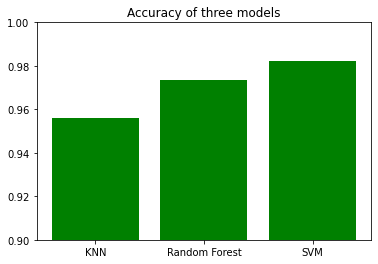

In [28]:
#plotting accuracies of three models
a=[a1,a2,a3]
models=['KNN','Random Forest','SVM']
plt.bar(models,a,color="green")
plt.title('Accuracy of three models')
plt.ylim(0.9,1)
plt.show()